In [5]:
#importing library files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.multicomp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [2]:
#reading data to python enviornment
df = pd.read_csv('Sales_data_zone_wise.csv')
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [3]:
#Checking for null values
df.isna().any()

Month       False
Zone - A    False
Zone - B    False
Zone - C    False
Zone - D    False
dtype: bool

# The mean sales generated by each zone.

In [26]:
#calculating f and p values for comparing means
fvalue, pvalue = stats.f_oneway(df['Zone - A'], df['Zone - B'], df['Zone - C'], df['Zone - D'])
print("The fvalue is:",fvalue)
print("The pvalue is:", pvalue)

The fvalue is: 5.672056106843581
The pvalue is: 0.0011827601694503335


In [27]:
#calculatig critical value
c = stats.f.ppf(1-0.05,3,84)
print("The critical value f is:",c)

The critical value f is: 2.713227129429893


In [28]:
#Reshaping data frame
data_melt = pd.melt(df.reset_index(), id_vars=['Month'], value_vars=['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'])
data_melt.columns = ['month', 'zone', 'value']

In [29]:
#getting ANOVA table
model = ols('value ~ zone', data=data_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
zone,1.483058e+12,3.0,5.672056,0.001183
Residual,9.761449e+12,112.0,NaN,NaN


# Insights
calculated value of f =5.672056

critical value of f = 2.7132

calculated value > critical value

Therfore we reject H0. So the mean sales of zones are different.

# Compare Total sales generated by all the zones for each month.

In [ ]:
H0: Total sales generated by all zones for each month equal

H1: Total sales generated by all zones for each month different

In [30]:
#Reshaping dataframe
data_melt = pd.melt(df.reset_index(), id_vars=['Month'], value_vars=['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'])
data_melt.columns = ['month', 'zone', 'value']
#getting ANOVA table
model = ols('value ~ month+zone', data=data_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
month,2.444073e+12,28.0,1.002028,0.476823
zone,1.483058e+12,3.0,5.674932,0.001374
Residual,7.317376e+12,84.0,NaN,NaN


In [31]:
#finding critical value
c=stats.f.ppf(1-0.05,28,84)
print("The critical value of f for month is:",c)

The critical value of f for month is: 1.6104146193885325


# Insights
 
The pvalue is 0.4768 and pvalue>0.05

calculated value of f =1.002028

critical value of f = 1.610414

calculated value < critical value

Therfore we accept H0. So the total sales generated by all zones for each month are same.

# Check whether all the zones generate the same amount of sales.

In [ ]:
H0: Amount of sales of all zones equal

H1: Amount of sales of all zones are different

In [32]:
#Reshaping dataframe
data_melt = pd.melt(df.reset_index(), id_vars=['Month'], value_vars=['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'])
data_melt.columns = ['month', 'zone', 'value']

#getting ANOVA table
model = ols('value ~ month+zone', data=data_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
month,2.444073e+12,28.0,1.002028,0.476823
zone,1.483058e+12,3.0,5.674932,0.001374
Residual,7.317376e+12,84.0,NaN,NaN


In [33]:
#calculating critical value
c = scipy.stats.f.ppf(1-0.05,3,84)
print("The critical value f is:",c)

The critical value f is: 2.713227129429893


# Insights

pvalue=0.01374 pvalue<0.05 and

calculated value of f =5.672056

critical value of f = 2.7132

calculated value > critical value

Therfore we reject H0. So the amount of sales of all zones are different.

<AxesSubplot:>

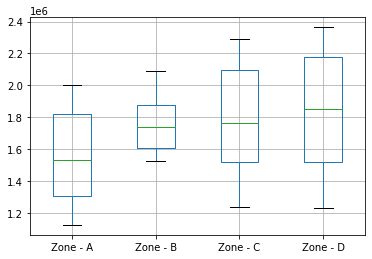

In [34]:
#Pictorial Representation supporting findings
df.boxplot(column=['Zone - A','Zone - B','Zone - C','Zone - D'])

From this box plot it is clear that there is variation in amount of sales for each zone.
For each zone the amount of sales are different. Its mean values are also diffrent